<a href="https://colab.research.google.com/github/FernandaSzAdr/KNN_cromossome/blob/master/TesteRede1_Binaria_Base2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers.core import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
train_path = 'drive/My Drive/Base_CNN/Binarizado2/Train'
test_path = 'drive/My Drive/Base_CNN/Binarizado2/Test'
validation_path = 'drive/My Drive/Base_CNN/Binarizado2/Validation'



---



## Implementação



*   Batch size = 32
*   Image size = 120x120



In [0]:
results = {}

In [0]:
bSize = 32

In [0]:
datagen = ImageDataGenerator(rescale=1/255.)

In [7]:
train_batches = datagen.flow_from_directory(train_path, target_size=(120, 120), 
                                            classes=['C', 'NC'], 
                                            batch_size=bSize)
test_batches = datagen.flow_from_directory(test_path, target_size=(120, 120), 
                                           classes=['C', 'NC'], 
                                           batch_size=bSize)
validation_batches = datagen.flow_from_directory(validation_path, 
                                                 target_size=(120, 120), 
                                                 classes=['C', 'NC'], 
                                                 batch_size=bSize)

Found 4154 images belonging to 2 classes.
Found 1298 images belonging to 2 classes.
Found 1038 images belonging to 2 classes.


In [0]:
stepsPerEpoche = len(train_batches)/bSize
validationSteps = len(validation_batches)/bSize

In [0]:
test_batches.class_indices

{'C': 0, 'NC': 1}



---



### 1 tentativa Accuracy: 50.20%


**Descrição**


*   Modelo descrito no artigo "Crowdsourcing for Chromosome Segmentation and Deep Classification"



In [0]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(16, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(8, (3, 3), activation='relu'),
    Conv2D(8, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(1024, activation='sigmoid'),
    Dense(512, activation='sigmoid'),
   
    Dense(2, activation='softmax')
]
)

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_architecture_1.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 77s - loss: 0.6962 - acc: 0.5312 - val_loss: 0.6953 - val_acc: 0.4531

Epoch 00001: val_loss improved from inf to 0.69530, saving model to drive/My Drive/Resultado/weights_architecture_1.hdf5
Epoch 2/50
 - 81s - loss: 0.6937 - acc: 0.4937 - val_loss: 0.6857 - val_acc: 0.5625

Epoch 00002: val_loss improved from 0.69530 to 0.68566, saving model to drive/My Drive/Resultado/weights_architecture_1.hdf5
Epoch 3/50
 - 84s - loss: 0.6962 - acc: 0.4875 - val_loss: 0.7075 - val_acc: 0.4062

Epoch 00003: val_loss did not improve from 0.68566
Epoch 4/50
 - 76s - loss: 0.6956 - acc: 0.5000 - val_loss: 0.6995 - val_acc: 0.4688

Epoch 00004: val_loss did not improve from 0.68566
Epoch 5/50
 - 75s - loss: 0.7046 - acc: 0.4875 - val_loss: 0.6712 - val_acc: 0.6094

Epoch 00005: val_loss improved from 0.68566 to 0.67122, saving model to drive/My Drive/Resultado/weights_architecture_1.hdf5
Epoch 6/50
 - 76s - loss: 0.7108 - acc: 0.4500 - val_loss: 0.7405 - val_acc: 0.4688

Epoch 00006: val_

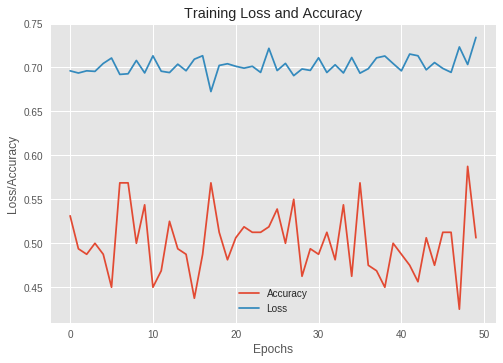

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/architecture_1.png', bbox_inches='tight')

In [0]:
model.load_weights('drive/My Drive/Resultado/weights_architecture_1.hdf5')

In [0]:
results['architecture_1'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 574s 18s/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_1'][0], 100 * results['architecture_1'][1]))

Test Loss: 0.7272472605109215 | Test Accuracy: 50.20%




---



### 2 tentativa Accuracy: 48.83%

**Descrição**


*   Modelo descrito no artigo "Crowdsourcing for Chromosome Segmentation and Deep Classification"
*   Alteração nas duas ultimas camadas Dense





In [0]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(16, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(8, (3, 3), activation='relu'),
    Conv2D(8, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
   
    Dense(2, activation='softmax')
]
)

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_architecture_2.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 2s - loss: 0.6948 - acc: 0.4625 - val_loss: 0.6928 - val_acc: 0.6094

Epoch 00001: val_loss improved from inf to 0.69282, saving model to drive/My Drive/Resultado/weights_architecture_2.hdf5
Epoch 2/50
 - 1s - loss: 0.6937 - acc: 0.4937 - val_loss: 0.6931 - val_acc: 0.5938

Epoch 00002: val_loss did not improve from 0.69282
Epoch 3/50
 - 1s - loss: 0.6933 - acc: 0.5125 - val_loss: 0.6933 - val_acc: 0.5000

Epoch 00003: val_loss did not improve from 0.69282
Epoch 4/50
 - 1s - loss: 0.6940 - acc: 0.4750 - val_loss: 0.6933 - val_acc: 0.4531

Epoch 00004: val_loss did not improve from 0.69282
Epoch 5/50
 - 1s - loss: 0.6913 - acc: 0.5938 - val_loss: 0.6947 - val_acc: 0.4219

Epoch 00005: val_loss did not improve from 0.69282
Epoch 6/50
 - 1s - loss: 0.6941 - acc: 0.4750 - val_loss: 0.6926 - val_acc: 0.5625

Epoch 00006: val_loss improved from 0.69282 to 0.69257, saving model to drive/My Drive/Resultado/weights_architecture_2.hdf5
Epoch 7/50
 - 1s - loss: 0.6926 - acc: 0.5125 

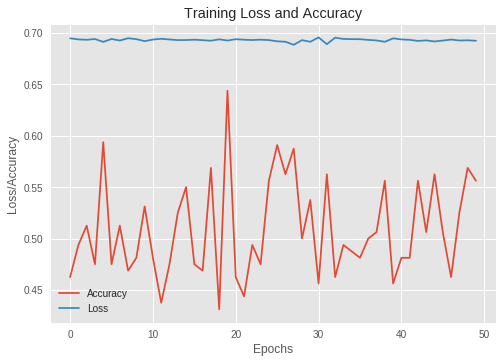

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/architecture_2.png', bbox_inches='tight')

In [0]:
model.load_weights('drive/My Drive/Resultado/weights_architecture_2.hdf5')

In [0]:
results['architecture_2'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 115s 4s/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_2'][0], 100 * results['architecture_2'][1]))

Test Loss: 0.6938245873898268 | Test Accuracy: 48.83%


### 3 tentativa Accuracy: 82.42%

Modelo criado pelo **Lucas Valentim**

https://github.com/lucasvalentim/chromosome-recognizer/blob/master/chromosome_recognizer.ipynb

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_architecture_3.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 4s - loss: 1.9439 - acc: 0.5187 - val_loss: 0.6925 - val_acc: 0.6406

Epoch 00001: val_loss improved from inf to 0.69255, saving model to drive/My Drive/Resultado/weights_architecture_3.hdf5
Epoch 2/50
 - 0s - loss: 1.5202 - acc: 0.5094 - val_loss: 0.7297 - val_acc: 0.6719

Epoch 00002: val_loss did not improve from 0.69255
Epoch 3/50
 - 1s - loss: 1.2372 - acc: 0.5719 - val_loss: 0.5182 - val_acc: 0.7656

Epoch 00003: val_loss improved from 0.69255 to 0.51815, saving model to drive/My Drive/Resultado/weights_architecture_3.hdf5
Epoch 4/50
 - 1s - loss: 0.8357 - acc: 0.6125 - val_loss: 0.5826 - val_acc: 0.7266

Epoch 00004: val_loss did not improve from 0.51815
Epoch 5/50
 - 1s - loss: 0.7188 - acc: 0.7062 - val_loss: 0.6042 - val_acc: 0.6739

Epoch 00005: val_loss did not improve from 0.51815
Epoch 6/50
 - 1s - loss: 0.6332 - acc: 0.7156 - val_loss: 0.5603 - val_acc: 0.7188

Epoch 00006: val_loss did not improve from 0.51815
Epoch 7/50
 - 1s - loss: 0.4847 - acc: 0.7875 

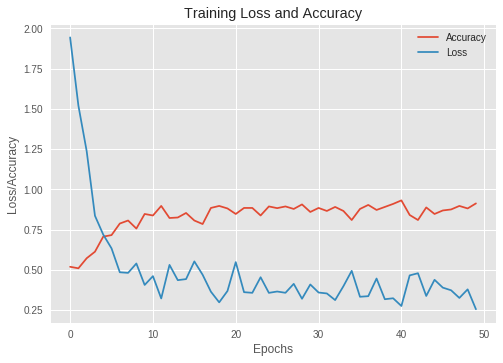

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/architecture_3.png', bbox_inches='tight')

In [0]:
model.load_weights('drive/My Drive/Resultado/weights_architecture_3.hdf5')

In [0]:
results['architecture_3'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 26s 820ms/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_3'][0], 100 * results['architecture_3'][1]))

Test Loss: 0.4576370036229491 | Test Accuracy: 82.42%


### 4 tentativa  Accuracy: 91.50%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_architecture_4.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 0.5066 - acc: 0.7531 - val_loss: 1.5576 - val_acc: 0.6172

Epoch 00001: val_loss improved from inf to 1.55763, saving model to drive/My Drive/Resultado/weights_architecture_4.hdf5
Epoch 2/50
 - 1s - loss: 0.3726 - acc: 0.8706 - val_loss: 1.3294 - val_acc: 0.6250

Epoch 00002: val_loss improved from 1.55763 to 1.32936, saving model to drive/My Drive/Resultado/weights_architecture_4.hdf5
Epoch 3/50
 - 1s - loss: 0.3990 - acc: 0.8656 - val_loss: 0.9812 - val_acc: 0.7031

Epoch 00003: val_loss improved from 1.32936 to 0.98116, saving model to drive/My Drive/Resultado/weights_architecture_4.hdf5
Epoch 4/50
 - 1s - loss: 0.3897 - acc: 0.8594 - val_loss: 0.5607 - val_acc: 0.8047

Epoch 00004: val_loss improved from 0.98116 to 0.56068, saving model to drive/My Drive/Resultado/weights_architecture_4.hdf5
Epoch 5/50
 - 1s - loss: 0.4259 - acc: 0.8563 - val_loss: 0.4963 - val_acc: 0.8594

Epoch 00005: val_loss improved from 0.56068 to 0.49634, saving model to drive/My Dri

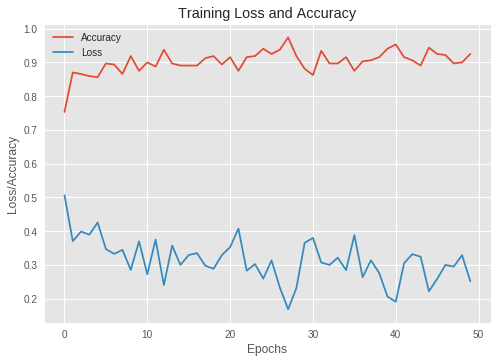

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/architecture_4.png', bbox_inches='tight')

In [0]:
model.load_weights('drive/My Drive/Resultado/weights_architecture_4.hdf5')

In [12]:
results['architecture_4'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 271s 8s/step


In [13]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_4'][0], 100 * results['architecture_4'][1]))

Test Loss: 0.32450786884874105 | Test Accuracy: 91.50%


### 5 tentativa Accuracy: 90.23%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**
*   Função **SGD** para compilação


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_architecture_5.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 3.1745 - acc: 0.5312 - val_loss: 1.6855 - val_acc: 0.4766

Epoch 00001: val_loss improved from inf to 1.68548, saving model to drive/My Drive/Resultado/weights_architecture_5.hdf5
Epoch 2/50
 - 0s - loss: 1.5446 - acc: 0.5906 - val_loss: 0.8405 - val_acc: 0.5000

Epoch 00002: val_loss improved from 1.68548 to 0.84046, saving model to drive/My Drive/Resultado/weights_architecture_5.hdf5
Epoch 3/50
 - 0s - loss: 1.6346 - acc: 0.4969 - val_loss: 0.9158 - val_acc: 0.5469

Epoch 00003: val_loss did not improve from 0.84046
Epoch 4/50
 - 0s - loss: 1.2386 - acc: 0.4937 - val_loss: 0.6496 - val_acc: 0.6641

Epoch 00004: val_loss improved from 0.84046 to 0.64956, saving model to drive/My Drive/Resultado/weights_architecture_5.hdf5
Epoch 5/50
 - 0s - loss: 0.8930 - acc: 0.5781 - val_loss: 0.8542 - val_acc: 0.4141

Epoch 00005: val_loss did not improve from 0.64956
Epoch 6/50
 - 0s - loss: 0.7430 - acc: 0.6844 - val_loss: 0.5685 - val_acc: 0.7812

Epoch 00006: val_loss i

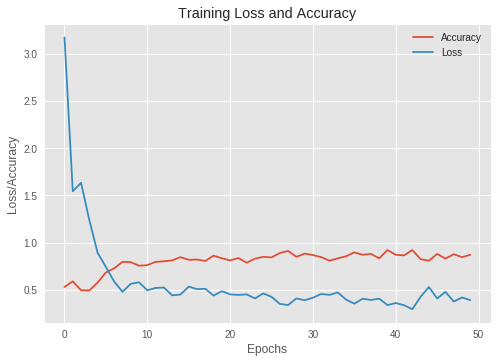

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/architecture_5.png', bbox_inches='tight')

In [0]:
model.load_weights('drive/My Drive/Resultado/weights_architecture_5.hdf5')

In [0]:
results['architecture_5'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 104ms/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_5'][0], 100 * results['architecture_5'][1]))

Test Loss: 0.550288911908865 | Test Accuracy: 76.66%


### 6 tentativa  Accuracy: 89.26%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**
*   Função **SGD** para compilação
*   **BatchNormalization** antes da ultima camada Dense


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.03, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_architecture_6.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 0.5518 - acc: 0.7375 - val_loss: 1.6902 - val_acc: 0.6719

Epoch 00001: val_loss improved from inf to 1.69021, saving model to drive/My Drive/Resultado/weights_architecture_6.hdf5
Epoch 2/50
 - 0s - loss: 0.3940 - acc: 0.8403 - val_loss: 0.7103 - val_acc: 0.7344

Epoch 00002: val_loss improved from 1.69021 to 0.71035, saving model to drive/My Drive/Resultado/weights_architecture_6.hdf5
Epoch 3/50
 - 0s - loss: 0.4291 - acc: 0.8656 - val_loss: 0.6930 - val_acc: 0.7344

Epoch 00003: val_loss improved from 0.71035 to 0.69303, saving model to drive/My Drive/Resultado/weights_architecture_6.hdf5
Epoch 4/50
 - 0s - loss: 0.3618 - acc: 0.8750 - val_loss: 0.3394 - val_acc: 0.9062

Epoch 00004: val_loss improved from 0.69303 to 0.33942, saving model to drive/My Drive/Resultado/weights_architecture_6.hdf5
Epoch 5/50
 - 0s - loss: 0.3820 - acc: 0.8656 - val_loss: 0.5685 - val_acc: 0.7188

Epoch 00005: val_loss did not improve from 0.33942
Epoch 6/50
 - 0s - loss: 0.3558 -

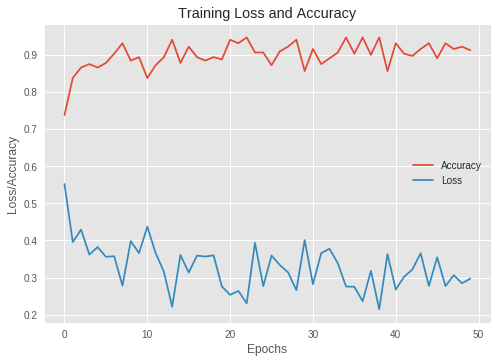

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/architecture_6.png', bbox_inches='tight')

In [0]:
model.load_weights('drive/My Drive/Resultado/weights_architecture_6.hdf5')

In [17]:
results['architecture_6'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 11s 337ms/step


In [18]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_6'][0], 100 * results['architecture_6'][1]))

Test Loss: 0.41866651899181306 | Test Accuracy: 89.26%


### 7 tentativa  Accuracy: 90.04%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**
*   Função **Adadelta** para compilação
*   **BatchNormalization** antes da ultima camada Dense


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adadelta

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_architecture_7.hdf5', verbose=1, save_best_only=True)

In [22]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 41s - loss: 0.4458 - acc: 0.7969 - val_loss: 0.4325 - val_acc: 0.8438

Epoch 00001: val_loss improved from inf to 0.43251, saving model to drive/My Drive/Resultado/weights_architecture_7.hdf5
Epoch 2/50
 - 40s - loss: 0.4904 - acc: 0.8094 - val_loss: 0.8663 - val_acc: 0.7422

Epoch 00002: val_loss did not improve from 0.43251
Epoch 3/50
 - 43s - loss: 0.4537 - acc: 0.8063 - val_loss: 0.5630 - val_acc: 0.8594

Epoch 00003: val_loss did not improve from 0.43251
Epoch 4/50
 - 40s - loss: 0.3213 - acc: 0.8750 - val_loss: 0.7821 - val_acc: 0.7812

Epoch 00004: val_loss did not improve from 0.43251
Epoch 5/50
 - 39s - loss: 0.3851 - acc: 0.8625 - val_loss: 0.4852 - val_acc: 0.8125

Epoch 00005: val_loss did not improve from 0.43251
Epoch 6/50
 - 36s - loss: 0.4238 - acc: 0.8438 - val_loss: 0.5047 - val_acc: 0.8047

Epoch 00006: val_loss did not improve from 0.43251
Epoch 7/50
 - 39s - loss: 0.3031 - acc: 0.9062 - val_loss: 0.8912 - val_acc: 0.7266

Epoch 00007: val_loss did not

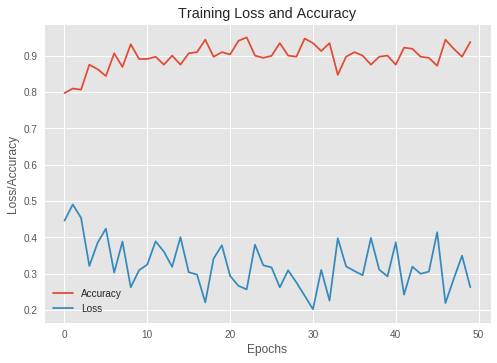

In [23]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/architecture_7.png', bbox_inches='tight')

In [0]:
model.load_weights('drive/My Drive/Resultado/weights_architecture_7.hdf5')

In [25]:
results['architecture_7'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 49s 2s/step


In [26]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_7'][0], 100 * results['architecture_7'][1]))

Test Loss: 0.3978253200184554 | Test Accuracy: 90.04%


### 8 tentativa  Accuracy: 90.19%

Modelo adaptado do **Lucas Albertins**

*   Função **Adadelta** para compilação


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adadelta

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_architecture_8.hdf5', verbose=1, save_best_only=True)

In [30]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 2.4729 - acc: 0.5469 - val_loss: 1.2081 - val_acc: 0.4453

Epoch 00001: val_loss improved from inf to 1.20811, saving model to drive/My Drive/Resultado/weights_architecture_8.hdf5
Epoch 2/50
 - 1s - loss: 1.5021 - acc: 0.6031 - val_loss: 1.0068 - val_acc: 0.5938

Epoch 00002: val_loss improved from 1.20811 to 1.00678, saving model to drive/My Drive/Resultado/weights_architecture_8.hdf5
Epoch 3/50
 - 1s - loss: 1.1941 - acc: 0.6250 - val_loss: 0.6608 - val_acc: 0.6094

Epoch 00003: val_loss improved from 1.00678 to 0.66079, saving model to drive/My Drive/Resultado/weights_architecture_8.hdf5
Epoch 4/50
 - 1s - loss: 0.9243 - acc: 0.6156 - val_loss: 0.7034 - val_acc: 0.6719

Epoch 00004: val_loss did not improve from 0.66079
Epoch 5/50
 - 1s - loss: 0.8350 - acc: 0.6531 - val_loss: 0.5445 - val_acc: 0.7500

Epoch 00005: val_loss improved from 0.66079 to 0.54446, saving model to drive/My Drive/Resultado/weights_architecture_8.hdf5
Epoch 6/50
 - 1s - loss: 0.6723 -

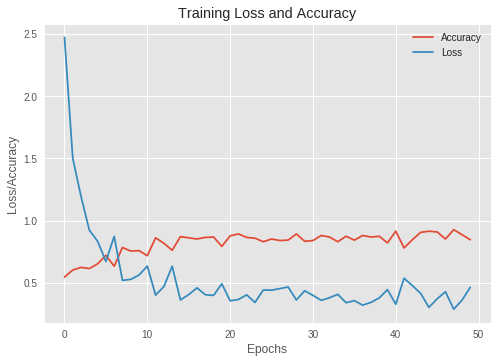

In [31]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/architecture_8.png', bbox_inches='tight')

In [0]:
model.load_weights('drive/My Drive/Resultado/weights_architecture_8.hdf5')

In [33]:
results['architecture_8'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 13s 403ms/step


In [34]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_8'][0], 100 * results['architecture_8'][1]))

Test Loss: 0.3636344885453582 | Test Accuracy: 90.19%


### 9 tentativa  Accuracy: 86.33%

Modelo adaptado do **Lucas Albertins**

*   Função **SGD** para compilação


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.03, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_architecture_9.hdf5', verbose=1, save_best_only=True)

In [38]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 4.3597 - acc: 0.5781 - val_loss: 3.7852 - val_acc: 0.4531

Epoch 00001: val_loss improved from inf to 3.78523, saving model to drive/My Drive/Resultado/weights_architecture_9.hdf5
Epoch 2/50
 - 0s - loss: 2.9763 - acc: 0.5406 - val_loss: 0.9242 - val_acc: 0.5625

Epoch 00002: val_loss improved from 3.78523 to 0.92420, saving model to drive/My Drive/Resultado/weights_architecture_9.hdf5
Epoch 3/50
 - 0s - loss: 0.8275 - acc: 0.6312 - val_loss: 0.7643 - val_acc: 0.5469

Epoch 00003: val_loss improved from 0.92420 to 0.76425, saving model to drive/My Drive/Resultado/weights_architecture_9.hdf5
Epoch 4/50
 - 0s - loss: 0.9545 - acc: 0.5466 - val_loss: 0.6750 - val_acc: 0.6641

Epoch 00004: val_loss improved from 0.76425 to 0.67499, saving model to drive/My Drive/Resultado/weights_architecture_9.hdf5
Epoch 5/50
 - 0s - loss: 0.5948 - acc: 0.7156 - val_loss: 0.5974 - val_acc: 0.6875

Epoch 00005: val_loss improved from 0.67499 to 0.59739, saving model to drive/My Dri

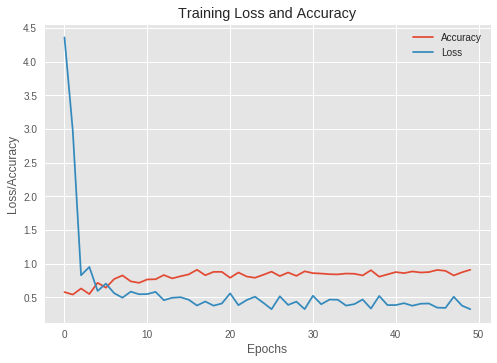

In [39]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/architecture_9.png', bbox_inches='tight')

In [0]:
model.load_weights('drive/My Drive/Resultado/weights_architecture_9.hdf5')

In [41]:
results['architecture_9'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 6s 175ms/step


In [42]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_9'][0], 100 * results['architecture_9'][1]))

Test Loss: 0.4041961790062487 | Test Accuracy: 86.33%


### 10 tentativa  Accuracy: 89.89%

Modelo adaptado do **Lucas Albertins**

*   Função **adam** para compilação
*   Adicionado mais 2 camadas convolutivas

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_architecture_10.hdf5', verbose=1, save_best_only=True)

In [46]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 4s - loss: 2.2787 - acc: 0.5187 - val_loss: 0.9668 - val_acc: 0.4453

Epoch 00001: val_loss improved from inf to 0.96676, saving model to drive/My Drive/Resultado/weights_architecture_10.hdf5
Epoch 2/50
 - 1s - loss: 1.3968 - acc: 0.5656 - val_loss: 0.9484 - val_acc: 0.4844

Epoch 00002: val_loss improved from 0.96676 to 0.94841, saving model to drive/My Drive/Resultado/weights_architecture_10.hdf5
Epoch 3/50
 - 1s - loss: 1.3370 - acc: 0.5438 - val_loss: 0.6485 - val_acc: 0.6562

Epoch 00003: val_loss improved from 0.94841 to 0.64850, saving model to drive/My Drive/Resultado/weights_architecture_10.hdf5
Epoch 4/50
 - 1s - loss: 0.8529 - acc: 0.5906 - val_loss: 1.1023 - val_acc: 0.4062

Epoch 00004: val_loss did not improve from 0.64850
Epoch 5/50
 - 1s - loss: 0.7517 - acc: 0.6597 - val_loss: 1.2342 - val_acc: 0.5078

Epoch 00005: val_loss did not improve from 0.64850
Epoch 6/50
 - 1s - loss: 0.7066 - acc: 0.6688 - val_loss: 0.7480 - val_acc: 0.6094

Epoch 00006: val_los

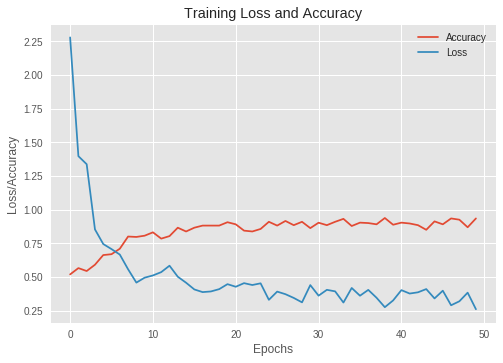

In [47]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/architecture_10.png', bbox_inches='tight')

In [0]:
model.load_weights('drive/My Drive/Resultado/weights_architecture_10.hdf5')

In [49]:
results['architecture_10'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 4s 112ms/step


In [50]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_10'][0], 100 * results['architecture_10'][1]))

Test Loss: 0.3267460325732827 | Test Accuracy: 89.89%


### 11 tentativa  Accuracy: 88.96%

Modelo adaptado do **Lucas Albertins**

*   Função **SGD** para compilação
*   Adicionado mais 2 camadas convolutivas

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_architecture_11.hdf5', verbose=1, save_best_only=True)

In [54]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 4s - loss: 2.3261 - acc: 0.5000 - val_loss: 1.0641 - val_acc: 0.5781

Epoch 00001: val_loss improved from inf to 1.06413, saving model to drive/My Drive/Resultado/weights_architecture_11.hdf5
Epoch 2/50
 - 1s - loss: 1.6069 - acc: 0.5500 - val_loss: 0.6946 - val_acc: 0.6016

Epoch 00002: val_loss improved from 1.06413 to 0.69457, saving model to drive/My Drive/Resultado/weights_architecture_11.hdf5
Epoch 3/50
 - 1s - loss: 1.0486 - acc: 0.5687 - val_loss: 0.7076 - val_acc: 0.6172

Epoch 00003: val_loss did not improve from 0.69457
Epoch 4/50
 - 1s - loss: 1.0107 - acc: 0.6219 - val_loss: 0.6284 - val_acc: 0.8047

Epoch 00004: val_loss improved from 0.69457 to 0.62838, saving model to drive/My Drive/Resultado/weights_architecture_11.hdf5
Epoch 5/50
 - 1s - loss: 0.8011 - acc: 0.6531 - val_loss: 0.6219 - val_acc: 0.8203

Epoch 00005: val_loss improved from 0.62838 to 0.62191, saving model to drive/My Drive/Resultado/weights_architecture_11.hdf5
Epoch 6/50
 - 1s - loss: 0.71

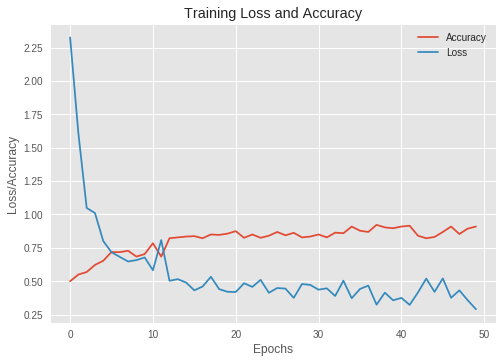

In [55]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/architecture_11.png', bbox_inches='tight')

In [0]:
model.load_weights('drive/My Drive/Resultado/weights_architecture_11.hdf5')

In [12]:
results['architecture_11'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 221s 7s/step


In [13]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_11'][0], 100 * results['architecture_11'][1]))

Test Loss: 0.4066310990601778 | Test Accuracy: 88.96%


### 12 tentativa  Accuracy: 87.74%

Modelo adaptado do **Lucas Albertins**

*   Sem utilização das funções de regularização
*   Função **SGD** para compilação
*   Adicionado mais 2 camadas convolutivas

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='drive/My Drive/Resultado/weights_architecture_12.hdf5', verbose=1, save_best_only=True)

In [17]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 37s - loss: 1.5100 - acc: 0.4844 - val_loss: 0.7369 - val_acc: 0.5234

Epoch 00001: val_loss improved from inf to 0.73690, saving model to drive/My Drive/Resultado/weights_architecture_12.hdf5
Epoch 2/50
 - 35s - loss: 1.8112 - acc: 0.4594 - val_loss: 0.6854 - val_acc: 0.5391

Epoch 00002: val_loss improved from 0.73690 to 0.68537, saving model to drive/My Drive/Resultado/weights_architecture_12.hdf5
Epoch 3/50
 - 36s - loss: 1.0034 - acc: 0.5375 - val_loss: 0.6720 - val_acc: 0.5703

Epoch 00003: val_loss improved from 0.68537 to 0.67203, saving model to drive/My Drive/Resultado/weights_architecture_12.hdf5
Epoch 4/50
 - 35s - loss: 0.9757 - acc: 0.5156 - val_loss: 0.6596 - val_acc: 0.5234

Epoch 00004: val_loss improved from 0.67203 to 0.65956, saving model to drive/My Drive/Resultado/weights_architecture_12.hdf5
Epoch 5/50
 - 38s - loss: 0.7198 - acc: 0.6344 - val_loss: 0.6496 - val_acc: 0.6797

Epoch 00005: val_loss improved from 0.65956 to 0.64964, saving model to dri

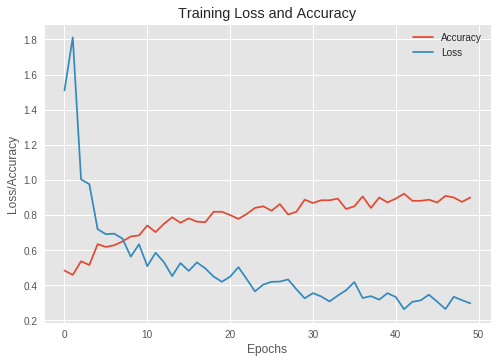

In [18]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('drive/My Drive/Resultado/architecture_12.png', bbox_inches='tight')

In [0]:
model.load_weights('drive/My Drive/Resultado/weights_architecture_12.hdf5')

In [20]:
results['architecture_12'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 46s 1s/step


In [21]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_12'][0], 100 * results['architecture_12'][1]))

Test Loss: 0.3209293116815388 | Test Accuracy: 87.74%
